In [1]:
#https://github.com/Gunjan933/twitter-sentiment-analysis/blob/master/twitter-sentiment-analysis.ipynb {Copyright (c) 2019 Gunjan Nandy}
#https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e
#https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [2]:
from google.colab import files
#upload the provided dataset (train.csv) 
uploaded = files.upload()

Saving train.csv to train (6).csv


In [3]:
import csv
import re
import numpy as np                                #used as multidimensional array of data
import pandas as pd                               #used to read csv file and create variable with rows and columns
import json, nltk                                 #used for text processing libraries for tokenization, classification, stopwords
import matplotlib.pyplot as plt                   #used for 2D plotting
from wordcloud import WordCloud                   #used for data visualisation of most positive words
import seaborn as sns                             #used for probability based graphs
nltk.download('wordnet')                          #used for lemmitization 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd
import io
total_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(total_data)

       ItemID  Sentiment                                      SentimentText
0           1          0                       is so sad for my APL frie...
1           2          0                     I missed the New Moon trail...
2           3          1                            omg its already 7:30 :O
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4           5          0           i think mi bf is cheating on me!!!   ...
...       ...        ...                                                ...
19036   19048          1  @_amberlovely thats good  lol you have a very ...
19037   19049          1  @_amberlovely you scared the bijebus out of me...
19038   19050          0  @_Ambure_ Random, but I saw ur surgery pics, I...
19039   19051          0  @_AMH ha ha ha yeah. So how have you been huh?...
19040   19052          0  @_AMH You go 2 sleep ha ha I'm not tired ha ha...

[19041 rows x 3 columns]


In [5]:
pd.set_option('display.max_colwidth', -1)
total_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T


In [6]:
tweet = total_data.columns.values[2]
sentiment = total_data.columns.values[1]
tweet, sentiment

('SentimentText', 'Sentiment')

In [7]:
#emoticon classifcication
def emoji(tweet):
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O|(:\s?D|:-D|x-?D|X-?D|<3|:\*|;-?\)|;-?D|\(-?;|@-\)))', ' positiveemoji ', tweet)
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\||:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [8]:
#preprocess tweets
def process_tweet(tweet):
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs/hyperlinks
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('#', '', tweet)                                    # Removing '#' hash tag
    tweet = re.sub('@[A-Za-z0–9]+', '', tweet)                        # Removing @mentions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [9]:
#comparison between unproceesed and proceesed data
total_data['processed_tweet'] = np.vectorize(process_tweet)(total_data[tweet])

total_data.head(10)

,ItemID,Sentiment,SentimentText,processed_tweet
0,1,0,is so sad for my APL friend.............,is so sad for my APL friend
1,2,0,I missed the New Moon trailer...,missed the New Moon trailer
2,3,1,omg its already 7:30 :O,omg its already positiveemoji
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im soo im gunna CRy ve been at this dentist since was suposed just get crown put on mins
4,5,0,i think mi bf is cheating on me!!! T_T,think mi bf is cheating on me T_T
5,6,0,or i just worry too much?,or just worry too much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juusst Chillin
7,8,0,Sunny Again Work Tomorrow :-| TV Tonight,Sunny Again Work Tomorrow negetiveemoji TV Tonight
8,9,1,handed in my uniform today . i miss you already,handed in my uniform today miss you already
9,10,1,hmmmm.... i wonder how she my number @-),hmm wonder how she my number positiveemoji


In [10]:
#tokenization
tokenized_tweet = total_data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [is, so, sad, for, my, APL, friend]                                                                                 
1    [missed, the, New, Moon, trailer]                                                                                   
2    [omg, its, already, positiveemoji]                                                                                  
3    [Omgaga, Im, soo, im, gunna, CRy, ve, been, at, this, dentist, since, was, suposed, just, get, crown, put, on, mins]
4    [think, mi, bf, is, cheating, on, me, T_T]                                                                          
Name: processed_tweet, dtype: object

In [11]:
#lemminization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [is, so, sad, for, my, APL, friend]                                                                               
1    [missed, the, New, Moon, trailer]                                                                                 
2    [omg, it, already, positiveemoji]                                                                                 
3    [Omgaga, Im, soo, im, gunna, CRy, ve, been, at, this, dentist, since, wa, suposed, just, get, crown, put, on, min]
4    [think, mi, bf, is, cheating, on, me, T_T]                                                                        
Name: processed_tweet, dtype: object

In [12]:
#stopwords- we used inbuilt stop words
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

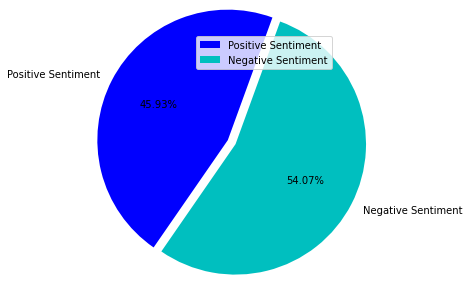

In [13]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(total_data[sentiment] != 0).sum(), (total_data[sentiment] == 0).sum()] 
colors = ['b', 'c']
analysis = ['Positive Sentiment', 'Negative Sentiment'] 
plt.pie(slices, labels = analysis, colors=colors, startangle=70,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

<Figure size 600x400 with 0 Axes>

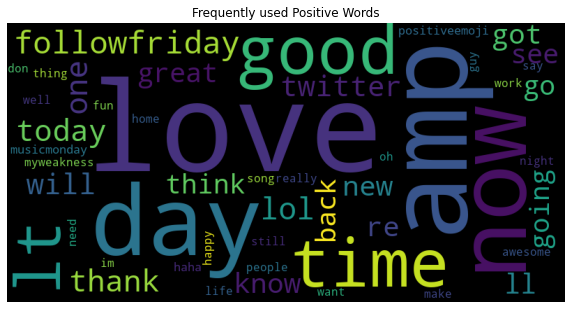

In [14]:
positive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 1]])
wc = WordCloud(width=800, height=400, max_words=50).generate(positive_words)
plt.figure(dpi=100)
plt.figure(figsize=(10, 7))
plt.imshow(wc)
plt.axis('off')
plt.title("Frequently used Positive Words")
plt.show()

In [15]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Create vectorizer 
count_vectorizer = CountVectorizer()   #bigram, unigram
#count_vectorizer = CountVectorizer(max_features=20) #if we use max_feature =20, out AUC value decreases to ~0.61
final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_tweet']) 
print("Vocabulary: ", count_vectorizer.vocabulary_)

# examine the vocabulary
count_vectorizer.get_feature_names()

#transform training data into a dense matrix
final_vectorized_data.toarray()
pd.DataFrame(final_vectorized_data.toarray(), columns=count_vectorizer.get_feature_names())

Vocabulary:  {'is': 9772, 'so': 17522, 'sad': 16307, 'for': 7095, 'my': 12705, 'apl': 831, 'friend': 7274, 'missed': 12221, 'the': 19041, 'new': 12970, 'moon': 12417, 'trailer': 19578, 'omg': 13469, 'its': 9819, 'already': 538, 'positiveemoji': 14651, 'omgaga': 13470, 'im': 9344, 'soo': 17627, 'gunna': 8206, 'cry': 4364, 've': 20506, 'been': 1646, 'at': 1078, 'this': 19144, 'dentist': 4859, 'since': 17201, 'was': 20895, 'suposed': 18476, 'just': 10222, 'get': 7646, 'crown': 4334, 'put': 15131, 'on': 13479, 'mins': 12188, 'think': 19124, 'mi': 12071, 'bf': 1814, 'cheating': 3229, 'me': 11860, 't_t': 18666, 'or': 13574, 'worry': 21479, 'too': 19462, 'much': 12599, 'juusst': 10236, 'chillin': 3325, 'sunny': 18444, 'again': 308, 'work': 21445, 'tomorrow': 19436, 'negetiveemoji': 12897, 'tv': 19862, 'tonight': 19452, 'handed': 8353, 'in': 9418, 'uniform': 20245, 'today': 19390, 'miss': 12219, 'you': 21764, 'hmm': 8820, 'wonder': 21400, 'how': 9047, 'she': 16916, 'number': 13275, 'must': 126

,__,__cheer,_amberlovely,_bellacullen,_butthead,_f,_halimarie,_inch_cock,_lou,_mag,_music_,_of_nine,_sweet_,_yafavfatboy,a_,a__melie,aa,aaah,aaand,aaarrgghh,aachen,aah,aahahaha,aahh,aaliyah,aamaustin,aand,aaooww,aar,aarhus,aaron,aarr,aarrgghh,aarrgh,aaw,aaww,aay,ab,abagail,abba,...,юбилейный,آخر,اذیت,استاد,به,بکنم,ترمی,تم,خودمو,خیلی,دی,زیاد,ساده,غلطی,نکردم,چه,บไต,ảnh,ứng,ㅋㅋ,凳等,嘿嘿,头脑风暴,看使用心得,개발,검색엔진,고고,기술없다,기술위,꿈꿉니다,만들려고,사람위,사람있지,으로는,준비,준비중입니다,지역광고서버를,팔로우,하고,현재
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19037,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data[sentiment],
                                                    test_size=0.2, random_state=69)   #20% test data, 80% train data
#print split dataset                                              
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (15232, 22014)
X_test_shape :  (3809, 22014)
y_train_shape :  (15232,)
y_test_shape :  (3809,)


In [17]:
#predict using Multinomial Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB

#instantiate a Multinomial Naive Bayes model
model_naive = MultinomialNB()

#train the model timimg with Ipython magic command
%time model_naive.fit(X_train, y_train)
%time predicted_naive = model_naive.predict(X_test)

CPU times: user 8.43 ms, sys: 848 µs, total: 9.27 ms
Wall time: 10.5 ms
CPU times: user 1.38 ms, sys: 0 ns, total: 1.38 ms
Wall time: 1.05 ms


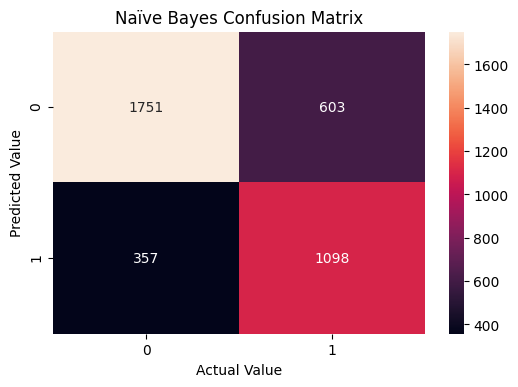

In [18]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=True)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [19]:
#Import scikit-learn metrics module
from sklearn import metrics
from sklearn.metrics import classification_report 
#model classification report
print(classification_report(y_test,predicted_naive))
# Model Accuracy for class prediction
print("Accuracy with Naive-bayes is :",metrics.accuracy_score(y_test, predicted_naive))


              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2108
           1       0.75      0.65      0.70      1701

    accuracy                           0.75      3809
   macro avg       0.75      0.74      0.74      3809
weighted avg       0.75      0.75      0.75      3809

Accuracy with Naive-bayes is : 0.7479653452349698


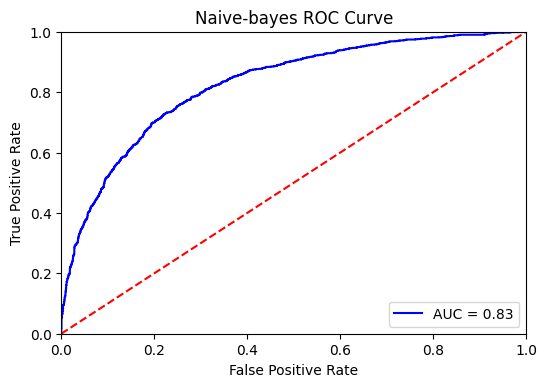

In [20]:
import sklearn.metrics as metrics
# calculate  false positive rate (fpr) and true positive rate (tpr) for all thresholds of the NB-classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#graph plot
import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.title('Naive-bayes ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()